In [345]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics import accuracy_score
#from wordcloud import WordCloud


In [346]:
df= pd.read_csv("combined_dataset.csv")# loading data 
df.head(10)

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,salemstate.edu,194914,0,1,7305,13,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,salemstate.ua.org,10000000,0,1,730,16,0,0,1,14,1,1
5,diannaopeizhi.com/js/,10000000,0,1,1096,21,0,0,0,17,1,1
6,www.synchrotech.com/support/install.html,10000000,0,1,12053,40,0,0,0,19,2,0
7,www.ansi.okstate.edu/breeds/swine/largeblackwh...,23191,0,0,0,50,0,0,0,20,3,0
8,www.strum.co.uk/webbery/,10000000,0,0,0,24,0,0,0,15,3,0
9,www.grok2.com/vi-emacs.html,10000000,0,1,6210,27,0,0,0,13,2,0


In [291]:
#df.head(10)

In [292]:
#df.tail(10)

#  Preprocessing steps -FAMILIARIZING WITH DATA- CHECKING DATA AND FEATURES 

In [347]:
df.shape # check shape

(95910, 12)

In [348]:
df.columns # check columns

Index(['domain', 'ranking', 'isIp', 'valid', 'activeDuration', 'urlLen', 'is@',
       'isredirect', 'haveDash', 'domainLen', 'nosOfSubdomain', 'label'],
      dtype='object')

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   domain          95910 non-null  object
 1   ranking         95910 non-null  int64 
 2   isIp            95910 non-null  int64 
 3   valid           95910 non-null  int64 
 4   activeDuration  95910 non-null  int64 
 5   urlLen          95910 non-null  int64 
 6   is@             95910 non-null  int64 
 7   isredirect      95910 non-null  int64 
 8   haveDash        95910 non-null  int64 
 9   domainLen       95910 non-null  int64 
 10  nosOfSubdomain  95910 non-null  int64 
 11  label           95910 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 8.8+ MB


In [350]:
# total missing values for each feature
df.isnull().sum() # int type 

domain            0
ranking           0
isIp              0
valid             0
activeDuration    0
urlLen            0
is@               0
isredirect        0
haveDash          0
domainLen         0
nosOfSubdomain    0
label             0
dtype: int64

In [351]:
#checking for null values if there's any 
df.isna().any() #string type 
# total missing values for each feature
# df.isnull().sum() 

domain            False
ranking           False
isIp              False
valid             False
activeDuration    False
urlLen            False
is@               False
isredirect        False
haveDash          False
domainLen         False
nosOfSubdomain    False
label             False
dtype: bool

In [352]:
df.isnull().values.any()

False

This isna shows that there's no null values


# VISUALIZING THE DATA - USE PLOTS AND GRAPHS, OR CORRELATION MAP  


In [353]:
import matplotlib.pyplot as plt # data analyze is to collect data statically 
%matplotlib inline


Theses plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

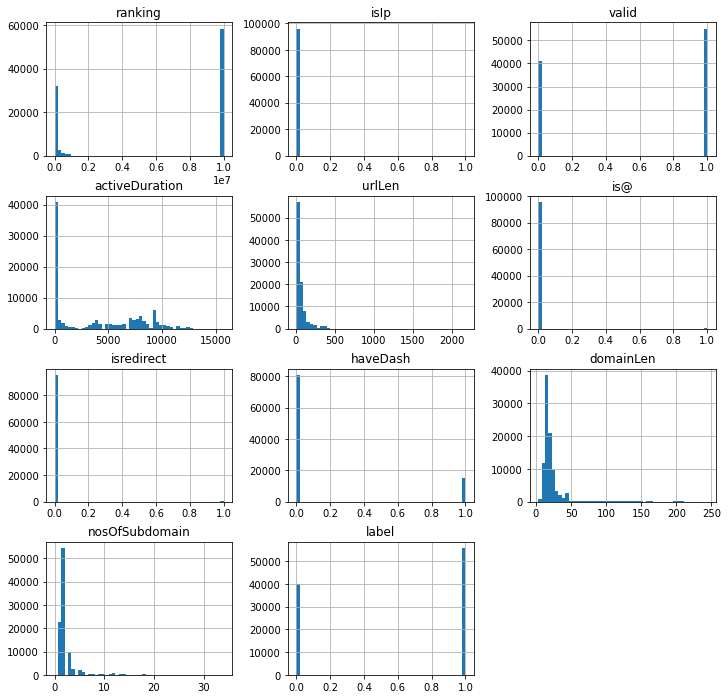

In [354]:
# plotting the data distribution 
df.hist(bins=50, figsize=(12,12))
plt.show()

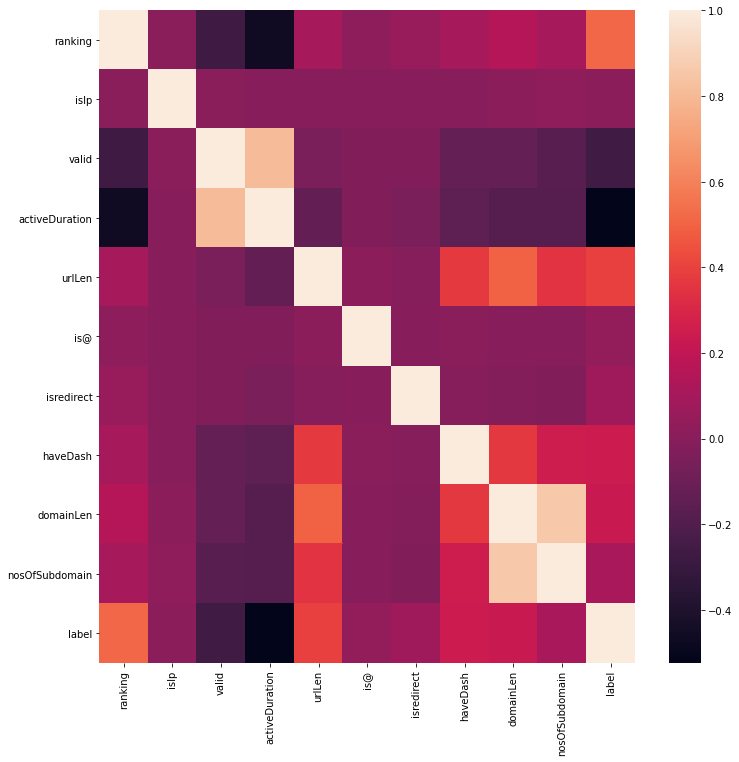

In [355]:
# correlation heatmap
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(df.corr()) #co-relation between features
plt.show()

This heat map shows activeDuration and valid has less co-relation with target(label)

In [356]:
# describe data - we use this to find some stat percentile, mean and std of 
#numerical values fo the series or DF
#Here, we clean the data by applying data preprocesssing techniques 
#and transform the data to use it in the models.
df.describe() 

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
count,9.591000e+04,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000
mean,6.118618e+06,0.000229,0.573892,3747.876144,69.326483,0.002773,0.007444,0.157856,23.409061,2.387718,0.582984
std,4.835254e+06,0.015144,0.494512,3974.587188,69.740521,0.052591,0.085960,0.364608,25.426852,2.140997,0.493068
min,1.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,3.205600e+04,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,14.000000,2.000000,0.000000
50%,1.000000e+07,0.000000,1.000000,2192.000000,44.000000,0.000000,0.000000,0.000000,17.000000,2.000000,1.000000
75%,1.000000e+07,0.000000,1.000000,7670.000000,78.000000,0.000000,0.000000,0.000000,22.000000,2.000000,1.000000
max,1.000000e+07,1.000000,1.000000,15707.000000,2175.000000,1.000000,1.000000,1.000000,244.000000,34.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the 'Domain' column from the dataset.

In [357]:
# Now we can drop a domain column 
df = df.drop(['domain','ranking','is@','haveDash','nosOfSubdomain','isredirect','isIp'], axis = 'columns')
df

,valid,activeDuration,urlLen,domainLen,label
0,0,0,20,20,1
1,1,7305,13,12,0
2,0,0,155,14,1
3,0,0,35,18,0
4,1,730,16,14,1
...,...,...,...,...,...
95905,1,8035,28,16,0
95906,1,8400,47,27,0
95907,0,0,43,29,1
95908,1,9862,41,14,0


In [358]:
data.isnull().sum() # after dropping domain now we have 11 features left 

ranking           0
isIp              0
valid             0
activeDuration    0
urlLen            0
is@               0
isredirect        0
haveDash          0
domainLen         0
nosOfSubdomain    0
label             0
dtype: int64

In [359]:
#6. SPLITTING THE DATA

# Target is label 

In [360]:
target=df.label
target[:10]
# 1 means phishing website and 0 means legitimate websites. 

0    1
1    0
2    1
3    0
4    1
5    1
6    0
7    0
8    0
9    0
Name: label, dtype: int64

In [361]:
# seperating and assigning features and target columns to x,y 
y=data['label']
x=data.drop('label',axis=1)
x.shape, y.shape

((95910, 10), (95910,))

Testing and training the data by importing train test 
Using Support vector machine and nearest neighbor 

In [362]:
# spliting dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test= train_test_split(df,target,test_size=0.3)  

In [363]:
x_train.shape, x_test.shape

((67137, 5), (28773, 5))

In [364]:
print(x_train[:10])

       valid  activeDuration  urlLen  domainLen  label
93631      1            9496      40         18      0
24925      0               0      29         24      0
39098      1            8401      18         15      0
91659      1             731      47         17      1
67879      1            9496      28         18      0
85570      1            6940      27         13      0
24230      1           10591      50         13      0
62715      1            6939     337         44      1
59381      0               0      44         20      1
17931      0               0     102         32      1


In [365]:
print(x_test[:10])

       valid  activeDuration  urlLen  domainLen  label
30769      1            8036      28         17      0
10975      1            8400      41         17      0
15145      1            6940      36         18      0
86986      0               0      24         12      0
27096      1             365     203         24      1
44339      1            8635      27         17      0
57346      0               0      37         21      1
81096      0               0      30         14      0
13412      0               0      29         23      1
85166      1            4017      33         13      1


In [366]:
print(y_train[:10])

93631    0
24925    0
39098    0
91659    1
67879    0
85570    0
24230    0
62715    1
59381    1
17931    1
Name: label, dtype: int64


In [367]:
print(y_test[:10])

30769    0
10975    0
15145    0
86986    0
27096    1
44339    0
57346    1
81096    0
13412    1
85166    1
Name: label, dtype: int64


# Naive Bayes 

In [375]:
from sklearn.naive_bayes import GaussianNB
# call our model equal to this GaussianNB
model=GaussianNB() # this is our model 

In [376]:
model.fit(x_train,y_train)

GaussianNB()

In [377]:
model.score(x_test,y_test)

0.9997219615611859

In [378]:
model.predict_proba(x_train[:10])

array([[1.00000000e+000, 1.35664962e-017],
       [1.00000000e+000, 1.88439418e-014],
       [1.00000000e+000, 5.90808713e-017],
       [2.81536308e-013, 1.00000000e+000],
       [1.00000000e+000, 1.45073306e-017],
       [1.00000000e+000, 1.11361012e-016],
       [1.00000000e+000, 1.18399067e-017],
       [1.22133943e-126, 1.00000000e+000],
       [5.83717511e-014, 1.00000000e+000],
       [4.17611039e-022, 1.00000000e+000]])

In [379]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0])

# Support vector machine

In [380]:
from sklearn.svm import SVC
model=SVC(C=20)

In [381]:
model.fit(x_train,y_train)

SVC(C=20)

In [382]:
model.score(x_test,y_test)

0.8279637159837347

# Nearest neighbor 


In [330]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
classifier = KNeighborsClassifier(n_neighbors=5)


In [331]:
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [332]:
y_pred = classifier.predict(x_test)

In [333]:
y_test[:10]

89863    1
76341    1
84669    1
6895     1
32347    0
35986    1
30782    1
66489    1
50882    1
11579    1
Name: label, dtype: int64

In [334]:
x_test[:10]

,valid,activeDuration,urlLen,domainLen,label
89863,1,7671,60,17,1
76341,0,0,143,89,1
84669,0,0,44,19,1
6895,1,1096,53,9,1
32347,1,6575,24,19,0
35986,0,0,42,14,1
30782,1,2192,285,29,1
66489,1,1827,65,64,1
50882,1,5113,114,23,1
11579,1,6574,32,31,1


# Decision Tree model 

In [383]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [384]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(x_test)
y_train_tree = tree.predict(x_train)

In [385]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)